# State of the art query sampling methods


In [12]:
import openml
import numpy as np
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt


dataset = openml.datasets.get_dataset(40996)
X, y, cat_indicator, a = dataset.get_data(dataset_format='array', target=dataset.default_target_attribute)
X = X.astype('float32') / 255.

n_iter = 10
batch_size = 50
total_accuracies = {}
model = MLPClassifier()

## Baal's BALD

We now test the BALD method as evocked in the slides.

In [ ]:
from baal.active_heuristics import BALD


class BALDSampler(ScoredQuerySampler):
    def __init__(self, classifier, batch_size: int,
                 strategy: str = 'top', assume_fitted: bool = False,
                 verbose: int = 0):
        super().__init__(batch_size, strategy=strategy)
        self.classifier_ = classifier
        self.assume_fitted = assume_fitted
        self.verbose = verbose
        if self.classifier_ == 'precomputed':
            self.assume_fitted = True
        else:
            check_proba_estimator(classifier)

    def fit(self, X: np.array, y: np.array) -> 'BALDSampler':
        if not self.assume_fitted:
            self.classifier_.fit(X, y)
        return self

    def score_samples(self, X: np.array) -> np.array:
        predictions = predict(X, self.classifier_)
        expected_entropy = - np.mean(np.sum(xlogy(predictions, predictions), axis=1),
                                     axis=-1)
        expected_p = np.mean(predictions, axis=-1)  # [batch_size, n_classes, ...]
        entropy_expected_p = - np.sum(xlogy(expected_p, expected_p),
                                      axis=1)  # [batch size, ...]
        bald_acq = entropy_expected_p - expected_entropy
        return bald_acq


## Cardinal methods

In this section, we focus on two recent methods:
* Diverse mini-batch active learning
* Core-sets (more precisely, k-center greedy)

## Benchmark

We run a benchmark of those methods.

/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-pac

/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-pac

/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-pac

/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-pac

/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-pac

/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aabraham/py36/lib64/python3.8/site-pac

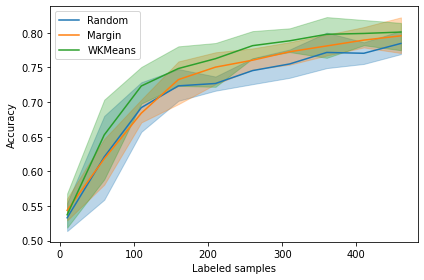

In [13]:
from cardinal.uncertainty import MarginSampler
from cardinal.random import RandomSampler
from cardinal.zhdanov2019 import TwoStepKMeansSampler
from cardinal.plotting import plot_confidence_interval


samplers = [
    ('Random', RandomSampler(batch_size)),
    ('Margin', MarginSampler(model, batch_size, assume_fitted=True)),
    ('WKMeans', TwoStepKMeansSampler(10, model, batch_size, assume_fitted=True))
]

figure_accuracies = plt.figure().number
idxs = {}

for sampler_name, sampler in samplers:
    
    all_accuracies = []

    for k in range(10):
        idx = ActiveLearningSplitter.train_test_split(X.shape[0], test_size=500, random_state=k)

        accuracies = []

        # For simplicity, the first batch is simply one sample from each class
        one_per_class = np.unique(y[idx.non_selected], return_index=True)[1]
        idx.add_batch(one_per_class)

        # A classic active learning loop
        for j in range(n_iter):
            model.fit(X[idx.selected], y[idx.selected])
            accuracies.append(model.score(X[idx.test], y[idx.test]))
            sampler.fit(X[idx.selected], y[idx.selected])
            idx.add_batch(sampler.select_samples(X[idx.non_selected]))

        all_accuracies.append(accuracies)
    
    # Keep the last splitter
    idxs[sampler_name] = idx
    
    x_data = np.arange(10, batch_size * (n_iter - 1) + 11, batch_size)

    plt.figure(figure_accuracies)
    plot_confidence_interval(x_data, all_accuracies, label=sampler_name)

plt.figure(figure_accuracies)
plt.xlabel('Labeled samples')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

plt.show()

# Play the devil advocate 

Chose another dataset, or change the parameters of this experiment in order to maximize the performance of one sampler. Can you do it?

(What should we do here? Give a list of tasks and samplers and let people try them? Or assign them collectively to have a wide variety of results?)